In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# Target - Customer Lifetime Value

<AxesSubplot:>

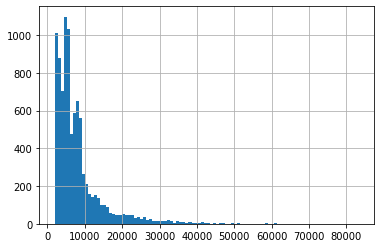

In [99]:
df['Customer Lifetime Value'].hist(bins=100)

<AxesSubplot:>

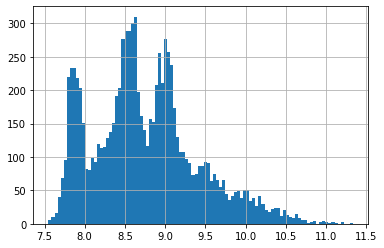

In [100]:
df['Customer Lifetime Value'].apply(np.log).hist(bins=100)

# Vehicle Size 

In [12]:
df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [17]:
df['Vehicle Size'] = df['Vehicle Size'].map({'Small': 0, 'Medsize': 1, 'Large': 2})

# Vehicle Class

In [19]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [20]:
# Total Claim Amount

<AxesSubplot:>

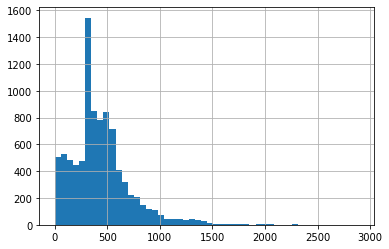

In [26]:
df['Total Claim Amount'].hist(bins=50)

<AxesSubplot:>

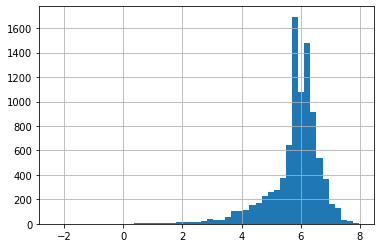

In [25]:
df['Total Claim Amount'].apply(np.log).hist(bins=50)

In [27]:
# Sales Channel

In [28]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [29]:
# Renew Offer Type

In [31]:
df['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [ ]:
# Policy

In [32]:
df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [33]:
# Policy Type

In [34]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [35]:
# Number of Policies 

<AxesSubplot:>

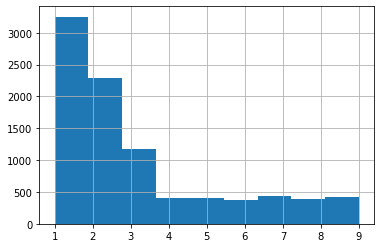

In [41]:
df['Number of Policies'].hist(bins=9)

In [ ]:
# Marital Status  

In [43]:
df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [44]:
# Gender

In [45]:
df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [46]:
# Education

In [47]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [66]:
df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

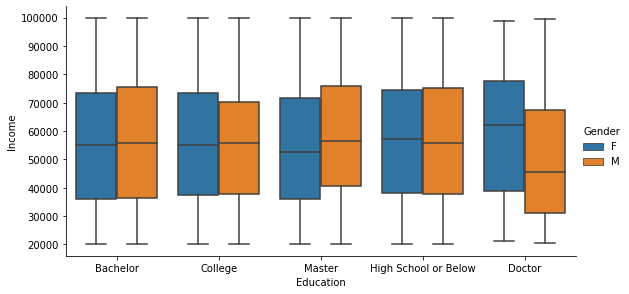

In [85]:
#only employed
mask_employed = df['EmploymentStatus'] == 'Employed'
sns.catplot(data=df[mask_employed], x='Education', y='Income', kind='box', hue='Gender', height=4, aspect=2)

In [86]:
df[mask_employed].groupby('Education')['Income'].apply(np.mean)

Education
Bachelor                56456.954759
College                 55922.259615
Doctor                  55047.546185
High School or Below    57056.515707
Master                  56301.801802
Name: Income, dtype: float64

# Location code

In [84]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

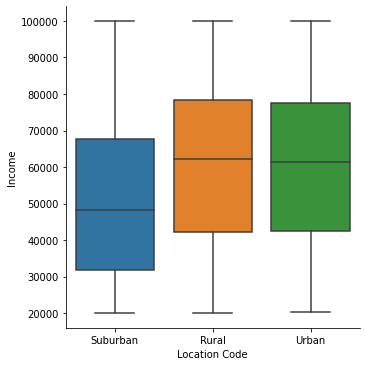

In [91]:
sns.catplot(x='Location Code', y='Income', data = df[mask_employed], kind='box')

In [92]:
# State

In [93]:
df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

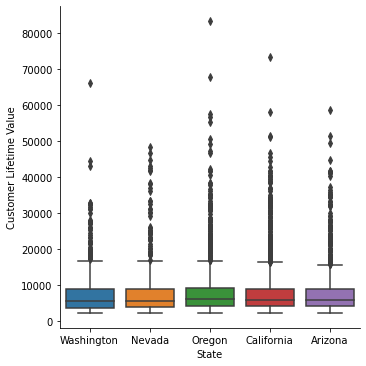

In [96]:
sns.catplot(x='State', y='Customer Lifetime Value', data = df[mask_employed], kind='box')